In [1]:
import numpy as np
import tensorflow as tf 

/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: P

In [2]:
n_features = 10
n_dense_neurons = 3


In [3]:
x = tf.placeholder(tf.float32, (None, n_features))

In [4]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [6]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [7]:
xW = tf.matmul(x, W)

In [8]:
Z = tf.add(xW, b)

In [9]:
a = tf.sigmoid(Z)

In [10]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

In [15]:
print(layer_out)

[[0.9451725  0.7370834  0.67894757]]


In [16]:
#  Simple regression example 

In [30]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [31]:
x_data 

array([-1.34019586,  2.06654197,  1.91960063,  4.37082723,  5.82125118,
        6.20883879,  5.86176262,  8.79343129,  9.38938266,  9.75283218])

In [32]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [33]:
y_label

array([ 1.3945227 ,  0.59312596,  3.26750916,  2.27991239,  5.73295165,
        6.33673876,  6.51406598,  8.07021124,  8.71223052, 11.14597957])

In [34]:
import matplotlib.pyplot as plt 

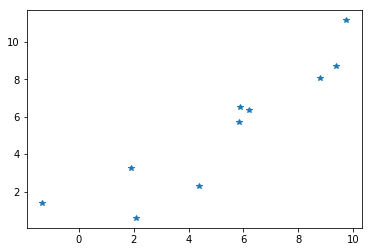

In [35]:
plt.plot(x_data, y_label, '*')

In [36]:
# y = mx + b

In [37]:
np.random.rand(2)


array([0.80522931, 0.74204703])

In [38]:
m = tf.Variable(0.22)
b = tf.Variable(0.66)

In [39]:
error = 0

for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2
    

In [40]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [41]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m, b])

In [46]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope*x_test + final_intercept

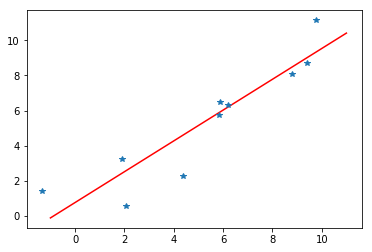

In [47]:
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')